In [2]:
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import matplotlib.pyplot as plt



In [12]:
#Read in the data

nfl_data = pd.read_csv("nfl_cap_data.csv")
nfl_data.head(5)

,Unnamed: 0,Team,W,L,T,win_pct,win_loss_diff,PF,Year,avg_age,total_cap,active_roster_spending,dead_cap
0,0,Patriots,12,4,0,0.750,8,420,2019,27.6,192501047,156633955,25721180
1,1,Bills,10,6,0,0.625,4,314,2019,26.9,174804987,152820449,16935454
2,2,Jets,7,9,0,0.438,-2,276,2019,26.0,188464903,96678757,27627375
3,3,Dolphins,5,11,0,0.313,-6,306,2019,25.4,175757955,60872168,66915649
4,4,Ravens,14,2,0,0.875,12,531,2019,26.8,190028527,139521776,30289731


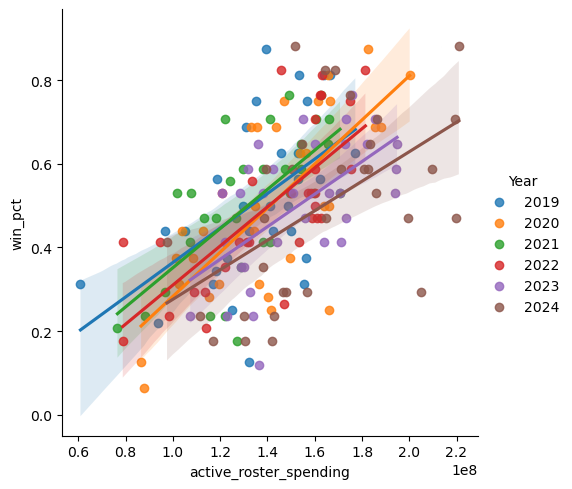

In [ ]:
#First question:
#Do teams with higher active roster spending perform better during the regular season?

#I decided to exclude the 2025 season because it isn't finished yet
exclude_2025 = nfl_data.loc[nfl_data["Year"] != 2025]
sns.lmplot(data=exclude_2025, x="active_roster_spending", y="win_pct", hue="Year")



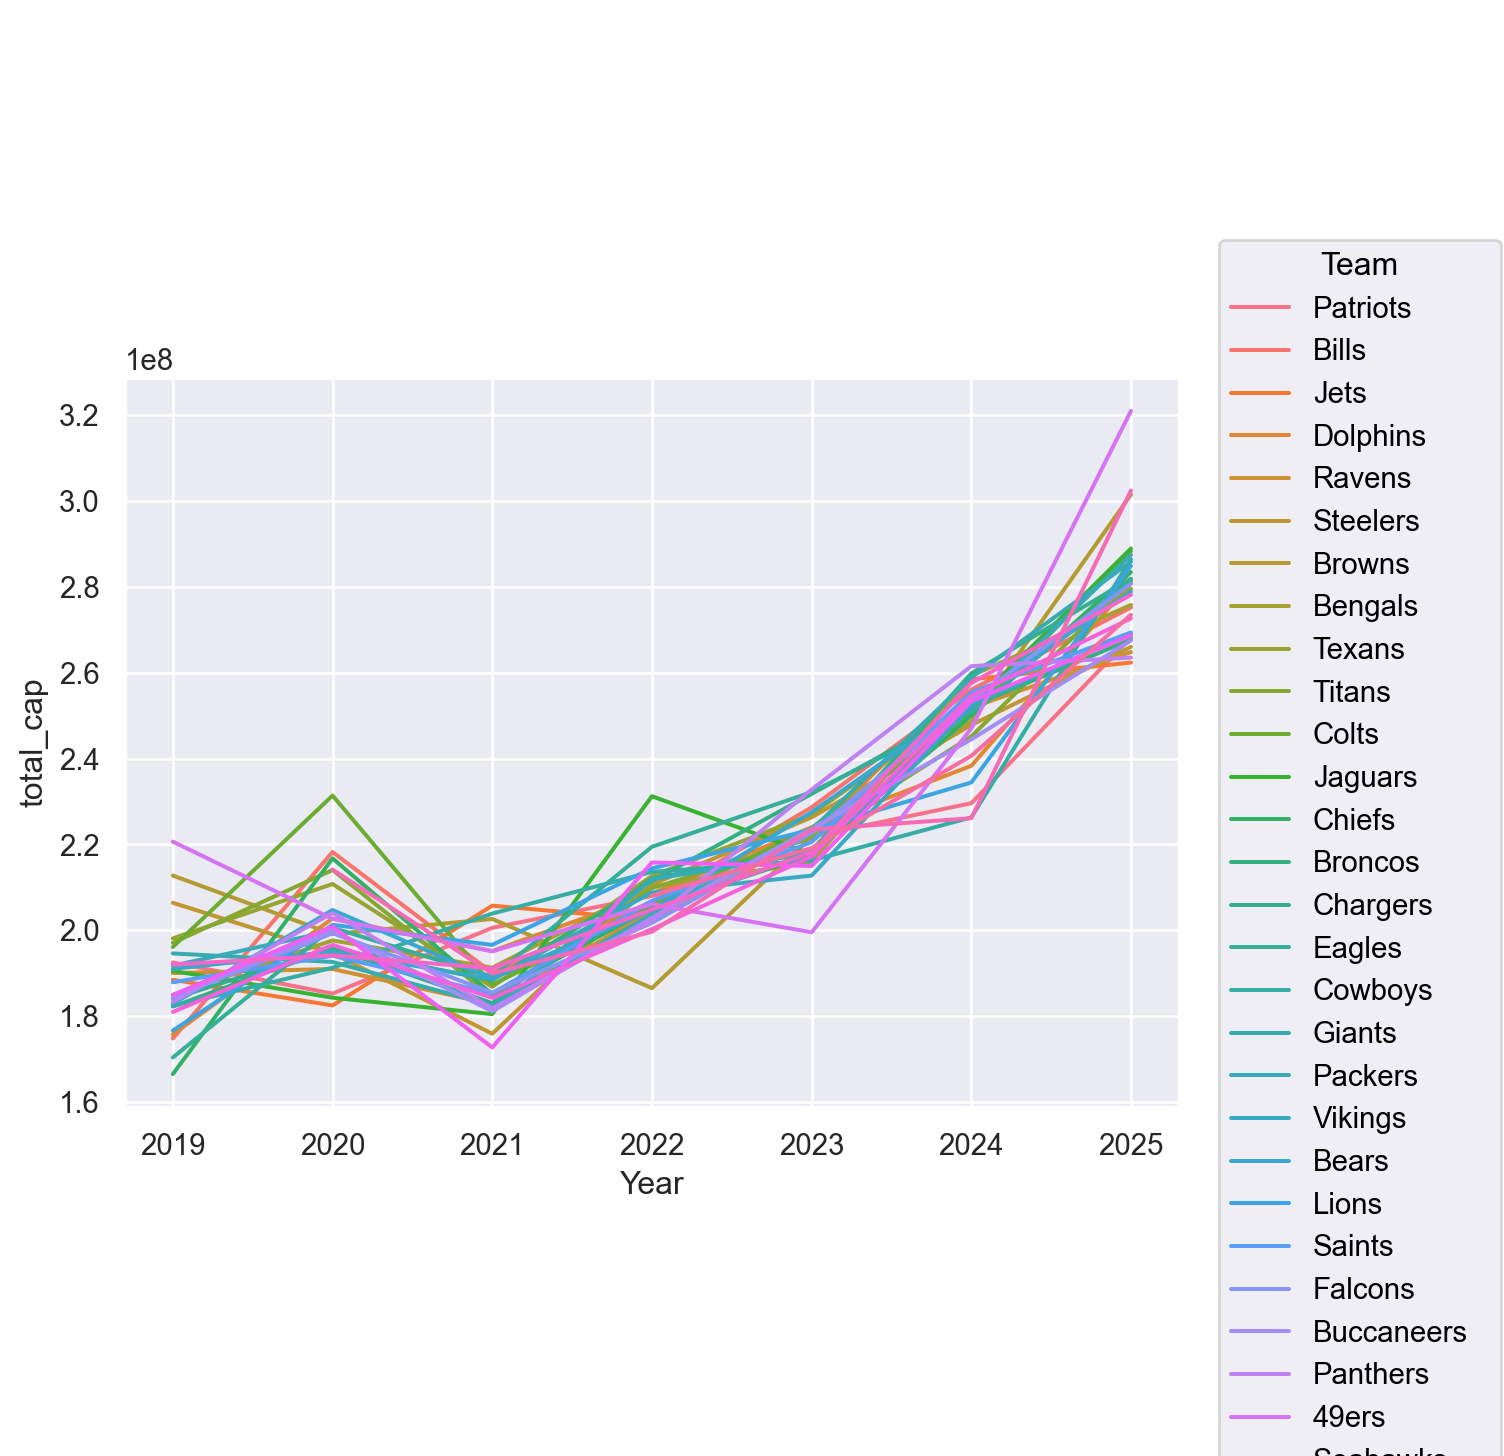

In [17]:
#Second question:
#How has cap space changed in the NFL in last 7 seasons?

p = so.Plot(nfl_data, "Year", "total_cap", color = "Team")
p.add(so.Line())

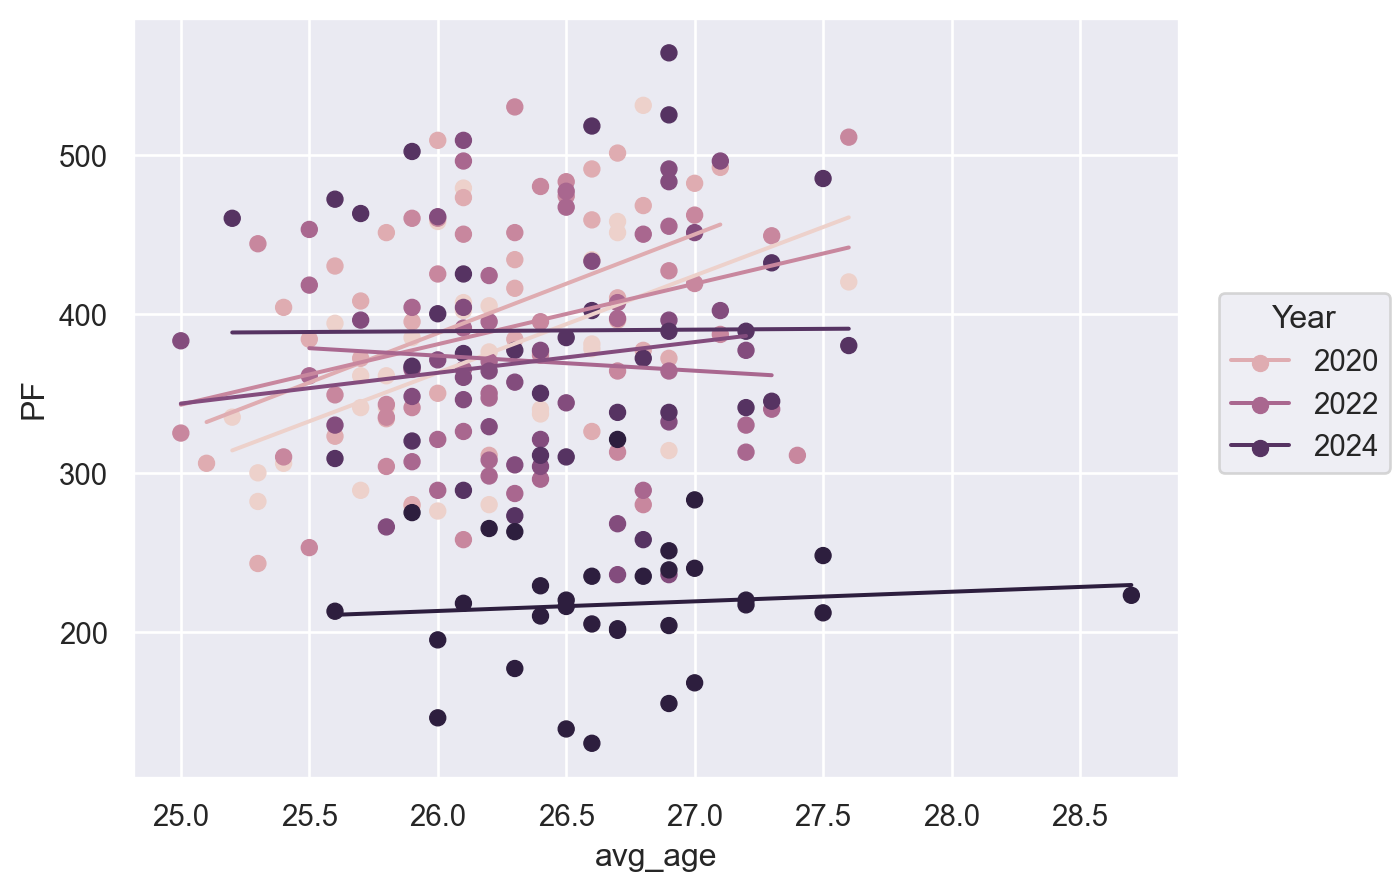

In [62]:
#Third Question:
#Does average team age impact their production in terms of points scored?

#sns.lmplot(data=nfl_data, x = "avg_age", y = "PF", hue = "Year")

p = (
    so.Plot(nfl_data, x="avg_age", y="PF", color="Year")
      .add(so.Dot())
      .add(so.Line(), so.PolyFit(order=1))
)

p

In [41]:
rb_mean = nfl_data.loc[nfl_data["Position"] == "running-back", "Cash Spent"].mean()
wr_mean = nfl_data.loc[nfl_data["Position"] == "wide-receiver", "Cash Spent"].mean()

print(rb_mean, wr_mean)

5649287.9728506785 14533596.411764706


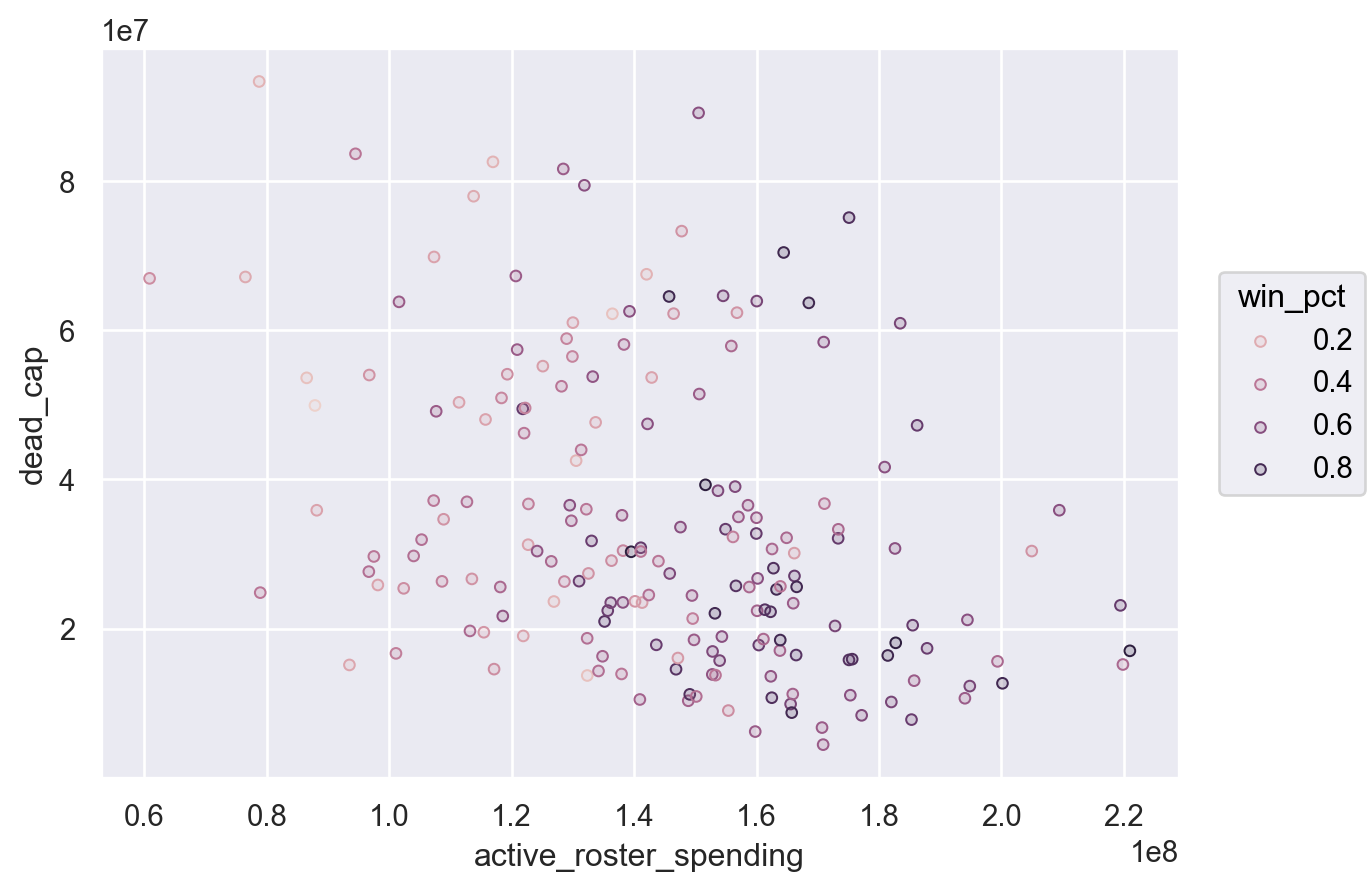

In [ ]:
#Question four:
#Can dead cap (money spent on players no longer on the roster) be an indicator of a poorly performing program?

p = so.Plot(exclude_2025, "active_roster_spending", "dead_cap", color = "win_pct")
p.add(so.Dots())
